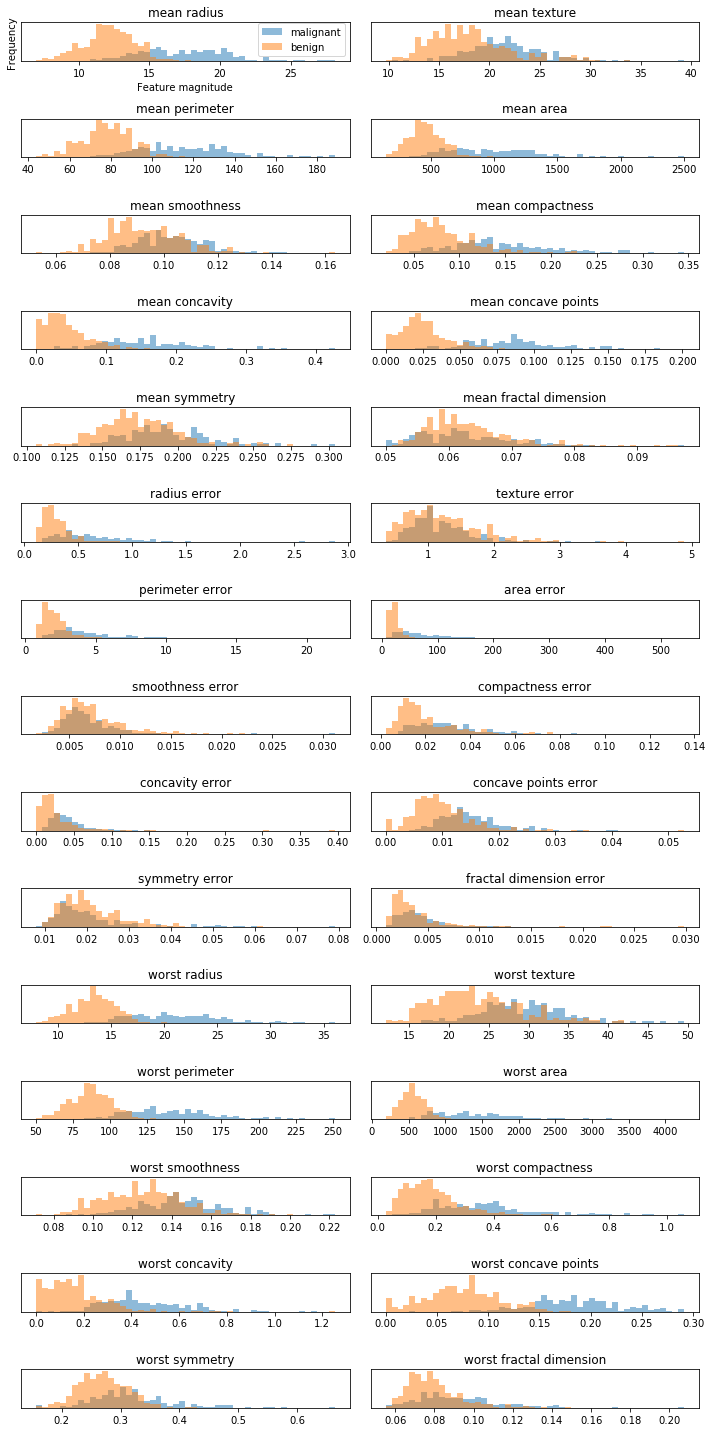

In [5]:
# From _Introduction to Machine Learning with Python_
# (slightly adapted)

from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
import numpy as np

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i],
               bins=bins,
               alpha=.5)
    ax[i].hist(benign[:, i],
               bins=bins,
               alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    ax[0].set_xlabel("Feature magnitude")
    ax[0].set_ylabel("Frequency")
    ax[0].legend(["malignant", "benign"], loc="best")
    fig.tight_layout()

In [6]:
from sklearn.datasets import fetch_lfw_people

In [8]:
people = fetch_lfw_people()

In [9]:
from sklearn.decomposition import NMF

In [10]:
from sklearn.manifold import TSNE

In [11]:
X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])

TSNE().fit_transform(X)

array([[-15.051096, 211.35359 ],
       [108.69129 , 245.18172 ],
       [ 18.78201 ,  87.6126  ],
       [142.52437 , 121.4407  ]], dtype=float32)

In [18]:
from sklearn.metrics.cluster import adjusted_rand_score, normalized_mutual_info_score

## Linear Model of Polynomially Related Data

In [173]:
data = np.array([(x, x**2) for x in range(6)])

In [182]:
from sklearn.linear_model import LinearRegression

In [186]:
m = LinearRegression().fit(data[:, 0].reshape(-1, 1), data[:, 1]).coef_

In [171]:
from sklearn.preprocessing import PolynomialFeatures

In [179]:
poly = PolynomialFeatures(include_bias=False).fit_transform(data[:, 0].reshape(-1, 1))

In [180]:
poly

array([[ 0.,  0.],
       [ 1.,  1.],
       [ 2.,  4.],
       [ 3.,  9.],
       [ 4., 16.],
       [ 5., 25.]])

In [183]:
m2 = LinearRegression().fit(poly, data[:, 1]).coef_

In [184]:
m2

array([5.6510067e-16, 1.0000000e+00])

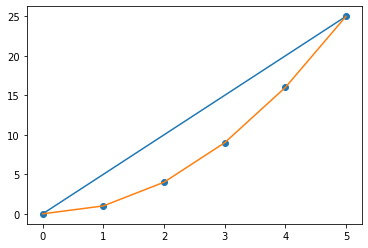

In [187]:
f, a = plt.subplots()

a.scatter(data[:, 0], data[:, 1])
a.plot([m*x for x in data[:, 0]])
a.plot([m2[0]*x1 + m2[1]*x2 for (x1, x2) in poly]);

In [1]:
def plot_line_poly_data(n, deg, fit=True, plot=True):
    
    """This function plots the best-fit line for data that
    in fact have a (perfect) higher-order polynomial
    relationship."""
    
    # Imports
    import numpy as np
    from matplotlib import pyplot as plt
    from sklearn.linear_model import LinearRegression
    
    # Construct the data given the inputs
    data = np.array([(x, x**deg) for x in range(n+1)])
    x = data[:, 0].reshape(-1, 1)
    y = data[:, 1]
    
    # Build the model
    lr = LinearRegression(fit_intercept=fit).fit(x, y)
    slope = lr.coef_
    intercept = lr.intercept_
    score = lr.score(x, y)
    
    # Plot
    if plot == True:
        f, a = plt.subplots()
        a.scatter(data[:, 0], data[:, 1])
        a.plot([slope*x + intercept for x in range(n+1)])
        a.set_title(f'$R^2 = $ {round(score, 3)}');
    
    return {(round(slope[0], 3), round(intercept, 3)): score}

{(100.0, -1650.0): 0.9363471226052922}

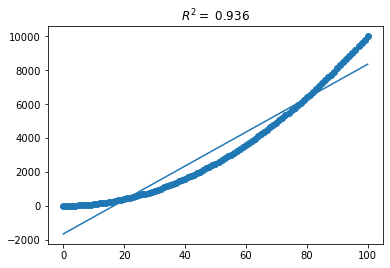

In [2]:
plot_line_poly_data(100, 2)

In [12]:
scores = [plot_line_poly_data(int(n), 2, plot=False) for n in np.logspace(1, 6, num=6)]

In [13]:
scores

[{(10.0, -15.0): 0.9276437847866419},
 {(100.0, -1650.0): 0.9363471226052922},
 {(1000.0, -166500.0): 0.9373830028839526},
 {(10000.0, -16665000.0): 0.9374882831542511},
 {(100000.0, -1666650000.0): 0.937498828144043},
 {(1000000.0, -166666500000.0): 0.9374998828126905}]

{(9029.8, -198990.0): 0.8381867048044365}

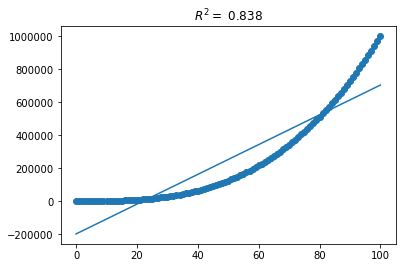

In [10]:
plot_line_poly_data(100, 3)

In [14]:
scores3 = [plot_line_poly_data(int(n), 3, plot=False) for n in np.logspace(1, 6, num=6)]

In [15]:
scores3

[{(92.8, -189.0): 0.8262342895519524},
 {(9029.8, -198990.0): 0.8381867048044365},
 {(900299.8, -199899900.0): 0.8398138720310819},
 {(90002999.8, -199989999000.0): 0.8399813387253637},
 {(9000029999.8, -199998999990000.03): 0.8399981333872587},
 {(900000299999.8, -1.999998999998999e+17): 0.8399998133338725}]

## Stacking dfs

In [30]:
df1 = pd.DataFrame(np.random.rand(3, 3))
df2 = pd.DataFrame(np.random.rand(3, 3))
df3 = pd.DataFrame(np.random.rand(3, 3))

np.dstack([df1, df2, df3]).mean(axis=2)

array([[0.45603246, 0.80681215, 0.40605251],
       [0.64405404, 0.40443364, 0.38358185],
       [0.32431033, 0.28920551, 0.79463329]])

## Coloring Map by Conference

In [2]:
from matplotlib import pyplot as plt

In [3]:
bigten = {
    'iowa_city': (41.7, -91.5),
    'minneapolis': (45.0, -93.3),
    'madison': (43.1, -89.4),
    'evanston': (42.0, -87.7),
    'east_lansing': (42.7, -84.5),
    'ann_arbor': (42.3, -83.7),
    'state_college': (40.8, -77.9),
    'new_brunswick': (40.5, -74.5),
    'college_park': (39.0, -76.9),
    'columbus': (40.0, -83.0),
    'bloomington': (39.1, -86.5),
    'west_lafayette': (40.4, -86.9),
    'champaign': (40.1, -88.2),
    'lincoln': (40.8, -96.7)
}

pac12 = {
    'seattle': (47.6, -122.3),
    'spokane': (47.7, -117.4),
    'salt_lake_city': (40.8, -111.9),
    'boulder': (40.0, -105.3),
    'tucson': (32.2, -111.0),
    'phoenix': (33.4, -112.1),
    'los_angeles': (34.1, -118.2),
    'palo_alto': (37.4, -122.1),
    'berkeley': (37.9, -122.3),
    'eugene': (44.1, -123.1),
    'corvallis': (44.6, -123.3)
}

big12 = {
    'ames': (42.0, -93.6),
    'morgantown': (39.6, -80.0),
    'austin': (30.3, -97.7),
    'waco': (31.5, -97.1),
    'fort_worth': (32.8, -97.3),
    'lubbock': (33.6, -101.9),
    'norman': (35.2, -97.4),
    'stillwater': (36.1, -97.1),
    'manhattan': (39.2, -96.6),
    'lawrence': (39.0, -95.2)
}

sec = {
    'tuscaloosa': (33.2, -87.6),
    'auburn': (32.6, -85.5),
    'gainesville': (29.7, -82.3),
    'columbia_sc': (34.0, -81.0),
    'athens': (34.0, -83.4),
    'knoxville': (36.0, -83.9),
    'lexington': (38.0, -84.5),
    'nashville': (36.2, -86.8),
    'columbia_mo': (39.0, -92.3),
    'fayetteville': (36.1, -94.2),
    'college_station': (30.6, -96.3),
    'baton_rouge': (30.5, -91.2),
    'oxford': (34.4, -89.5),
    'starkville': (33.5, -88.8)
}

acc = {
    'louisville': (38.3, -85.8),
    'pittsburgh': (40.4, -80.0),
    'syracuse': (43.0, -76.1),
    'boston': (42.4, -71.1),
    'charlottesville': (38.0, -78.5),
    'blacksburg': (37.2, -80.4),
    'winston-salem': (36.1, -80.2),
    'chapel_hill': (35.9, -79.1),
    'durham': (36.0, -78.9),
    'raleigh': (35.8, -78.6),
    'clemson': (34.7, -82.8),
    'miami': (25.8, -80.2),
    'tallahassee': (30.4, -84.3),
    'atlanta': (33.7, -84.4)
}

In [4]:
aac = {
    'cincinnati': (39.1, -84.5),
    'philadelphia': (40.0, -75.2),
    'annapolis': (39.0, -76.5),
    'greenville': (35.6, -77.4),
    'orlando': (28.5, -81.4),
    'tampa': (28.0, -82.5),
    'new_orleans': (30.0, -90.1),
    'houston': (29.8, -95.4),
    'dallas': (32.8, -96.8),
    'tulsa': (36.2, -96.0),
    'memphis': (35.1, -90.0)
}

cusa = {
    'birmingham': (33.5, -86.8),
    'hattiesburg': (31.3, -89.3),
    'ruston': (32.5, -92.6),
    'houston': (29.8, -95.4),
    'san_antonio': (29.4, -98.5),
    'el_paso': (31.8, -106.5),
    'denton': (33.2, -97.1),
    'murfreesboro': (35.8, -86.4),
    'bowling_green': (37.0, -86.5),
    'huntington': (38.4, -82.4),
    'norfolk': (36.9, -76.3),
    'charlotte': (35.2, -80.8),
    'boca_raton': (26.4, -80.1),
    'miami': (25.8, -80.2)
}

mac = {
    'akron': (41.1, -81.5),
    'kent': (41.2, -81.4),
    'buffalo': (42.9, -78.9),
    'athens': (39.3, -82.1),
    'oxford': (39.5, -84.7),
    'muncie': (40.2, -85.4),
    'dekalb': (41.9, -88.7),
    'kalamazoo': (42.3, -85.6),
    'mount_pleasant': (43.6, -84.8),
    'ypsilanti': (42.2, -83.6),
    'toledo': (41.7, -83.5),
    'bowling_green': (41.4, -83.7)
}

mwc = {
    'boise': (43.6, -116.2),
    'logan': (41.7, -111.8),
    'laramie': (41.3, -105.6),
    'fort_collins': (40.6, -105.1),
    'colorado_springs': (38.8, -104.8),
    'albuquerque': (35.1, -106.7),
    'las_vegas': (36.2, -115.1),
    'san_diego': (32.7, -117.2),
    'fresno': (36.7, -119.8),
    'san_jose': (37.3, -121.9),
    'reno': (39.5, -119.8),
}

sun = {
    'boone': (36.2, -81.7),
    'conway': (33.8, -79.0),
    'statesboro': (32.4, -81.8),
    'atlanta': (33.7, -84.4),
    'troy': (31.8, -86.0),
    'mobile': (30.7, -88.0),
    'lafayette': (30.2, -92.0),
    'monroe': (32.5, -92.1),
    'san_marcos': (29.9, -97.9),
    'jonesboro': (35.8, -90.7)
}

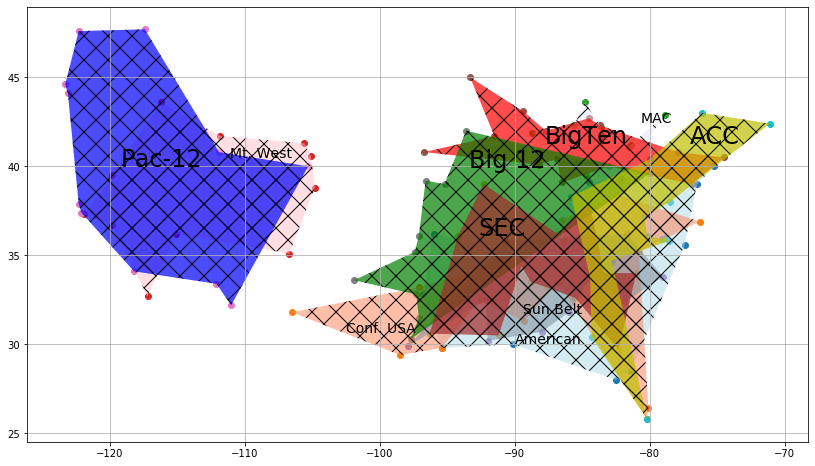

In [7]:
fig, ax = plt.subplots(figsize=(14, 8))

btx, bty = [coord[1] for coord in bigten.values()], [coord[0] for coord in bigten.values()]
ptx, pty = [coord[1] for coord in pac12.values()], [coord[0] for coord in pac12.values()]
btwx, btwy = [coord[1] for coord in big12.values()], [coord[0] for coord in big12.values()]
secx, secy = [coord[1] for coord in sec.values()], [coord[0] for coord in sec.values()]
accx, accy = [coord[1] for coord in acc.values()], [coord[0] for coord in acc.values()]
aacx, aacy = [coord[1] for coord in aac.values()], [coord[0] for coord in aac.values()]
cusx, cusy = [coord[1] for coord in cusa.values()], [coord[0] for coord in cusa.values()]
macx, macy = [coord[1] for coord in mac.values()], [coord[0] for coord in mac.values()]
mwcx, mwcy = [coord[1] for coord in mwc.values()], [coord[0] for coord in mwc.values()]
sunx, suny = [coord[1] for coord in sun.values()], [coord[0] for coord in sun.values()]

ax.scatter(aacx, aacy)
ax.fill(aacx, aacy, 'lightblue', hatch='x', alpha=0.5)
ax.text(x=np.mean(aacx)-4, y=np.mean(aacy)-4, s='American', fontsize=14)

ax.scatter(cusx, cusy)
ax.fill(cusx, cusy, 'coral', hatch='x', alpha=0.5)
ax.text(x=np.mean(cusx)-14, y=np.mean(cusy)-2, s='Conf. USA', fontsize=14)

ax.scatter(macx, macy)
ax.fill(macx, macy, 'lavender', hatch='x', alpha=0.5)
ax.text(x=np.mean(macx)+3, y=np.mean(macy)+1, s='MAC', fontsize=14)

ax.scatter(mwcx, mwcy)
ax.fill(mwcx, mwcy, 'pink', hatch='x', alpha=0.5)
ax.text(x=np.mean(mwcx)+2, y=np.mean(mwcy)+2, s='Mt. West', fontsize=14)

ax.scatter(sunx, suny)
ax.fill(sunx, suny, 'lightslategray', hatch='x', alpha=0.5)
ax.text(x=np.mean(sunx)-2, y=np.mean(suny)-1, s='Sun Belt', fontsize=14)

ax.scatter(btx, bty)
ax.fill(btx, bty, 'r', hatch='x', alpha=0.7)
ax.text(x=np.mean(btx)-2, y=np.mean(bty), s='BigTen', fontsize=24)

ax.scatter(ptx, pty)
ax.fill(ptx, pty, 'b', hatch='x', alpha=0.7)
ax.text(x=np.mean(ptx)-2, y=np.mean(pty), s='Pac-12', fontsize=24)

ax.scatter(btwx, btwy)
ax.fill(btwx, btwy, 'g', hatch='x', alpha=0.7)
ax.text(x=np.mean(btwx)+2, y=np.mean(btwy)+4, s='Big 12', fontsize=24)

ax.scatter(secx, secy)
ax.fill(secx, secy, 'brown', hatch='x', alpha=0.7)
ax.text(x=np.mean(secx)-5, y=np.mean(secy)+2, s='SEC', fontsize=24)

ax.scatter(accx, accy)
ax.fill(accx, accy, 'y', hatch='x', alpha=0.7)
ax.text(x=np.mean(accx)+3, y=np.mean(accy)+5, s='ACC', fontsize=24)

ax.grid(b=True);

In [12]:
lats = [v[0] for v in sun.values()]
longs = [v[1] for v in sun.values()]

lats

[36.2, 33.8, 32.4, 33.7, 31.8, 30.7, 30.2, 32.5, 29.9, 35.8]

In [22]:
confs = {'aac': aac, 'acc': acc, 'big12': big12, 'bigten': bigten, 'cusa': cusa,
          'mac': mac, 'mwc': mwc, 'pac12': pac12, 'sec': sec, 'sun': sun}

In [28]:
centers = {}
for conf in confs:
    lats = [v[0] for v in confs[conf].values()]
    longs = [v[1] for v in confs[conf].values()]
    centers[conf] = (np.mean(lats), np.mean(longs))

In [29]:
centers

{'aac': (34.00909090909091, -85.98181818181818),
 'acc': (36.26428571428571, -80.02857142857144),
 'big12': (35.93, -95.39),
 'bigten': (41.25, -85.76428571428572),
 'cusa': (32.64285714285713, -88.49285714285713),
 'mac': (41.44166666666666, -83.65833333333333),
 'mwc': (38.5, -113.0909090909091),
 'pac12': (39.98181818181819, -117.18181818181816),
 'sec': (34.128571428571426, -87.66428571428571),
 'sun': (32.7, -87.36)}

In [31]:
centers.items()

dict_items([('aac', (34.00909090909091, -85.98181818181818)), ('acc', (36.26428571428571, -80.02857142857144)), ('big12', (35.93, -95.39)), ('bigten', (41.25, -85.76428571428572)), ('cusa', (32.64285714285713, -88.49285714285713)), ('mac', (41.44166666666666, -83.65833333333333)), ('mwc', (38.5, -113.0909090909091)), ('pac12', (39.98181818181819, -117.18181818181816)), ('sec', (34.128571428571426, -87.66428571428571)), ('sun', (32.7, -87.36))])

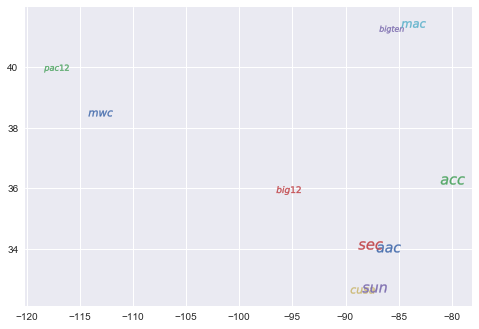

In [37]:
plt.style.use('seaborn')

fig, ax = plt.subplots()

for conf in centers.items():
    ax.scatter(conf[1][1], conf[1][0], marker=f'${conf[0]}$', s=600);

## Prime Factorizations

In [38]:
import sys, os

In [40]:
path = sys.path
path.append(os.pardir)

In [45]:
from primes.primes import IsPrime, p_fact,

In [52]:
facts = {}
for j in range(1, 10000):
    facts[j] = p_fact(j)

In [53]:
facts

{1: [],
 2: [1],
 3: [0, 1],
 4: [2],
 5: [0, 0, 1],
 6: [1, 1],
 7: [0, 0, 0, 1],
 8: [3],
 9: [0, 2],
 10: [1, 0, 1],
 11: [0, 0, 0, 0, 1],
 12: [2, 1],
 13: [0, 0, 0, 0, 0, 1],
 14: [1, 0, 0, 1],
 15: [0, 1, 1],
 16: [4],
 17: [0, 0, 0, 0, 0, 0, 1],
 18: [1, 2],
 19: [0, 0, 0, 0, 0, 0, 0, 1],
 20: [2, 0, 1],
 21: [0, 1, 0, 1],
 22: [1, 0, 0, 0, 1],
 23: [0, 0, 0, 0, 0, 0, 0, 0, 1],
 24: [3, 1],
 25: [0, 0, 2],
 26: [1, 0, 0, 0, 0, 1],
 27: [0, 3],
 28: [2, 0, 0, 1],
 29: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 30: [1, 1, 1],
 31: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 32: [5],
 33: [0, 1, 0, 0, 1],
 34: [1, 0, 0, 0, 0, 0, 1],
 35: [0, 0, 1, 1],
 36: [2, 2],
 37: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 38: [1, 0, 0, 0, 0, 0, 0, 1],
 39: [0, 1, 0, 0, 0, 1],
 40: [3, 0, 1],
 41: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 42: [1, 1, 0, 1],
 43: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 44: [2, 0, 0, 0, 1],
 45: [0, 2, 1],
 46: [1, 0, 0, 0, 0, 0, 0, 0, 1],
 47: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [57]:
import json

In [58]:
with open('/Users/gdamico/flatiron/primes/prime_factorizations.json', 'w') as f:
    json.dump(facts, f)

In [59]:
with open('/Users/gdamico/flatiron/primes/prime_factorizations_9999.json', 'r') as f:
    facts = json.load(f)

In [64]:
facts['12']

[2, 1]

In [66]:
facts['9999']

[0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [67]:
3**2*11*101

9999

In [88]:
for j in range(10000, 20000):
    facts[j] = p_fact(j)

In [90]:
with open('/Users/gdamico/flatiron/primes/prime_factorizations_19999.json', 'w') as f:
    json.dump(facts, f)

In [68]:
primes = []

for num in range(2, 10000):
    if IsPrime(num):
        primes.append(num)

In [69]:
primes

[2,
 3,
 5,
 7,
 11,
 13,
 17,
 19,
 23,
 29,
 31,
 37,
 41,
 43,
 47,
 53,
 59,
 61,
 67,
 71,
 73,
 79,
 83,
 89,
 97,
 101,
 103,
 107,
 109,
 113,
 127,
 131,
 137,
 139,
 149,
 151,
 157,
 163,
 167,
 173,
 179,
 181,
 191,
 193,
 197,
 199,
 211,
 223,
 227,
 229,
 233,
 239,
 241,
 251,
 257,
 263,
 269,
 271,
 277,
 281,
 283,
 293,
 307,
 311,
 313,
 317,
 331,
 337,
 347,
 349,
 353,
 359,
 367,
 373,
 379,
 383,
 389,
 397,
 401,
 409,
 419,
 421,
 431,
 433,
 439,
 443,
 449,
 457,
 461,
 463,
 467,
 479,
 487,
 491,
 499,
 503,
 509,
 521,
 523,
 541,
 547,
 557,
 563,
 569,
 571,
 577,
 587,
 593,
 599,
 601,
 607,
 613,
 617,
 619,
 631,
 641,
 643,
 647,
 653,
 659,
 661,
 673,
 677,
 683,
 691,
 701,
 709,
 719,
 727,
 733,
 739,
 743,
 751,
 757,
 761,
 769,
 773,
 787,
 797,
 809,
 811,
 821,
 823,
 827,
 829,
 839,
 853,
 857,
 859,
 863,
 877,
 881,
 883,
 887,
 907,
 911,
 919,
 929,
 937,
 941,
 947,
 953,
 967,
 971,
 977,
 983,
 991,
 997,
 1009,
 1013,
 1019,


In [70]:
with open('/Users/gdamico/flatiron/primes/primes_9999.json', 'w') as f:
    json.dump(primes, f)

In [91]:
with open('/Users/gdamico/flatiron/primes/primes_9999.json', 'r') as g:
    primes = json.load(g)

In [92]:
for num in range(10000, 20000):
    if IsPrime(num):
        primes.append(num)

In [95]:
with open('/Users/gdamico/flatiron/primes/primes_19999.json', 'w') as g:
    json.dump(primes, g)

In [82]:
def factorize(num):
    with open('/Users/gdamico/flatiron/primes/prime_factorizations_9999.json', 'r') as f:
        facts = json.load(f)
    with open('/Users/gdamico/flatiron/primes/primes_9999.json', 'r') as g:
        primes = json.load(g)
    list_ = facts[str(num)]
    last = len(list_)
    map_ = zip(list_, primes[:last])
    out = []
    for expon, prime in map_:
        if expon == 0:
            pass
        elif expon == 1:
            out.append(str(prime))
        else:
            out.append(str(prime) + '^' + str(expon))
    return '*'.join(out)

In [83]:
factorize(15)

'3*5'

In [84]:
factorize(256)

'2^8'

In [85]:
factorize(9999)

'3^2*11*101'